# Predicción de las exportaciones anuales de Jalisco para 2024

- Antonio Lomelí Ureña
- Carolina Martínez Escalante 
- Enrique Tonatiuh Pérez Cortés Barba

## Objetivos

> #### 1.1 Objetivo general.

>  - Predecir el total de exportaciones anuales de Jalisco en miles de dólares para el 2024.
> #### 1.2 Objetivos específicos

>  - Obtener de fuentes confiables y graficar los datos sobre las exportaciones anuales realizadas por Jalisco desde 2007.
>  - Usar la función minimize de la librería scipy para crear una ecuación que ajuste una curva lo mejor posible a estos datos, utilizando los siguientes polinomios:
>> - De grado tres ($\beta_1 + \beta_2x + \beta_3x^2 + \beta_4x^3$) porque gráficamente observamos que los puntos se podrían ajustar bien con este polinomio.
>> - De grado tres con un monomio senoidal    
($\beta_1 + \beta_2x + \beta_3x^2 + \beta_4x^3 + \beta_5sin(7x10^7x)$) porque por el comportamiento de los puntos pensamos que agregarle una función seno podría reducir el error cuadrado, es decir mejoraría el modelo del punto anterior.
>> - De grado uno con un monomio senoidal ($\beta_1 + \beta_2x + \beta_3sin(7x10^7x)$) porque partimos del supuesto de hacer un modelo de un polinomio de grado uno, sin embargo creemos que agregarle el componente senoidal mejoraría un modelo de grado 1.


>  - Evaluar la ecuación encontrada en el año deseado para poder realizar una predicción sobre el total en miles de dólares que se exportarán en ese año.

### Modelo que representa el problema.


Buscamos minimizar el error para lograr aproximar una curva que se ajuste lo mejor posible a los datos que tenemos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

Estos datos los obtuvimos de la página oficial del INEGI, en el tema de "economía y sectores productivos" con subapartado de "exportaciones por entidad federativa", al 15 de agosto de 2022.

Tomamos los que describen el valor anual de las exportaciones de Jalisco en el periodo de **2007 a 2021**, los datos están expresados en **miles de dólares**. Los valores del 2007 al 2017 son reales y los del 2018 al 2021 son preliminares, lo cual no quiere decir que no sean válidos o "reales" pero que se harán ajustes, serán ligeramente diferentes. Las industrias que serán ajustadas son las de agricultura, pesca, cría de animales, caza e industria química.

A continuación, el proceso de ***traer los datos de un archivo de Excel***:

In [2]:
datos=pd.read_excel("Datos exportaciones.xlsx")

In [3]:
exportaciones=datos["EXPORTACIONES"]
exportaciones

0     14445974
1     15360597
2     15059587
3     18800995
4     15333202
5     19379718
6     20104515
7     18737712
8     19737684
9     17877862
10    18687649
11    21133618
12    21659641
13    20093246
14    23161220
Name: EXPORTACIONES, dtype: int64

In [4]:
exp=np.array(exportaciones)
exp

array([14445974, 15360597, 15059587, 18800995, 15333202, 19379718,
       20104515, 18737712, 19737684, 17877862, 18687649, 21133618,
       21659641, 20093246, 23161220], dtype=int64)

En la siguiente figura graficamos el valor de las exportaciones (en miles de dólares) por año como puntos de un diagrama de dispersión. 

Se puede ver que hay una tendencia alcista. Observamos que la forma que más se podría ajustar es la de una curva de grado 3, también pensamos que si agregamos un componente senoidal a un polinomio de grado tres podríamos reducir el error. 

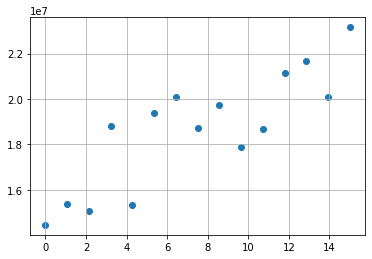

In [5]:
m=len(exp)
x = np.linspace(0, 15, m)
y= np.reshape(exp, [m, -1])
plt.figure()
plt.scatter(x, y)
plt.grid()

In [6]:
# Declaramos la función a minimizar
def funcion_costo(beta, X, y, size):
    beta = np.reshape(beta,[size,-1]) 
    pred= X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo [0][0]

# Construyendo matrices X
ones = np.ones([m,1])
x_1 = np.reshape(x,[m,-1])
x_2 = np.reshape(x**2,[m,-1])
x_3 = np.reshape(x**3,[m,-1])
x_sin = np.reshape(np.sin(7e+07*x),[m,-1])

X = np.hstack((ones,x_1,x_2,x_3,x_sin))
X_2 = np.hstack((ones,x_1,x_2,x_3))
X_3 = np.hstack((ones,x_1,x_sin))

# Declaramos las betas inciales
beta_inicial = np.random.rand(5)
beta_inicial_2 = np.random.rand(4)
beta_inicial_3 = np.random.rand(3)

# Formamos la matriz de datos históricos y
y = np.reshape(exp,[m,-1])

### Explicación 

>  -$X$ representa una matriz que contiene los valores de la variable independiente, sometida a condiciones (x cuadrada, x cúbica, seno de x), que al momento de ser multiplicada por la matriz beta nos da como resultado una matriz con valores de $ y $. Las $ y $ obtenidas son el valor de la variable dependiente para cada valor de la variable independiente cuando el polinomio tiene un conjunto de coeficientes beta. Estas $ y $ predichas son las que se restarán a las $y$ históricas para calcular el error y poder minimizarlo.

>  -$X$ tiene el mismo número de columnas que beta de renglones; estos números dependen de la cantidad de monomios dentro del polinomio. En este caso, tenemos polinomios formados por, 3, 4 y 5 monomios. 

>  -Para beta, utilizamos valores aleatorios inicialmente. El algoritmo los usa como punto de partida para proponer otros valores de beta que minimicen el error, o la distancia de los puntos a la curva formada por el polinomio. Los valores de la matriz beta que encuentra la función "minimize" son los coeficientes que mejor ajustan un modelo de "n" monomios.

>  -La matriz $y$ es un arreglo matricial de una columna que contiene todos los valores de la variable dependiente para cada valor de la independiente. Es a lo que restamos la predicción para obtener el error y minimizarlo hasta que la curva se ajuste de la mejor manera.

### Solución del problema de optimización.

En este apartado usamos la función minimize de la librería scipy para encontrar los coeficientes que, en los modelos propuestos, nos ayudan a representar mejor la realidad de las exportaciones de Jalisco.

La primera solución es para un polinomio:

$$ \beta_1 + \beta_2x + \beta_3x^2 + \beta_4x^3 + \beta_5sin(7x10^7x) $$

In [7]:
sol = opt.minimize(funcion_costo,beta_inicial,args=(X,y,5))
sol

      fun: 21819141827125.85
 hess_inv: array([[ 1.05749570e-03,  1.41331945e-04, -2.99402787e-04,
         2.11193725e-05,  1.03473675e-04],
       [ 1.41331945e-04,  2.25221774e-05, -4.90255456e-05,
         3.49373151e-06,  1.50472550e-05],
       [-2.99402787e-04, -4.90255456e-05,  1.07135904e-04,
        -7.63140592e-06, -3.23093272e-05],
       [ 2.11193725e-05,  3.49373151e-06, -7.63140592e-06,
         5.55353157e-07,  2.29443545e-06],
       [ 1.03473675e-04,  1.50472550e-05, -3.23093272e-05,
         2.29443545e-06,  1.05380022e-05]])
      jac: array([        0.,   3145728.,  -2097152., -52953088.,    524288.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 21
     njev: 98
   status: 2
  success: False
        x: array([ 1.39231577e+07,  1.49691110e+06, -1.60544588e+05,  6.59796406e+03,
        2.62721183e+05])

Usando la función minimize tenemos que el modelo queda:

$$ 1.39808374*10^7 + (1.44056647*10^6*x) - (1.51926078*10^5*x^2) + (6.25433845*10^3*x^3) + (2.1303346*10^5*sin(7x10^7x)) $$

---

La siguiente solución encuentra las betas de un polinomio:

$$ \beta_1 + \beta_2x + \beta_3x^2 + \beta_4x^3 $$

In [8]:
sol2 = opt.minimize(funcion_costo,beta_inicial_2,args=(X_2,y,4))
sol2

      fun: 22132178387440.973
 hess_inv: array([[ 3.55580851e-01,  2.34293848e-02, -1.37907306e-02,
         6.96965098e-04],
       [ 2.34293848e-02,  1.81414597e-03, -1.07084447e-03,
         5.66870398e-05],
       [-1.37907306e-02, -1.07084447e-03,  6.32138772e-04,
        -3.35026581e-05],
       [ 6.96965098e-04,  5.66870398e-05, -3.35026581e-05,
         1.80887241e-06]])
      jac: array([2.62144000e+05, 2.88358400e+06, 2.14958080e+07, 2.47201792e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 388
      nit: 17
     njev: 76
   status: 2
  success: False
        x: array([ 1.39573936e+07,  1.44848318e+06, -1.53717440e+05,  6.37385025e+03])

Y la solución encontrada es:

$$ 1.39015416*10^7 + (1.48163163e*10^6*x) - (1.48163163e*10^5*x^2) + (6.56359465*10^3*x^3) $$

---

Nuestra última solución es para un polinomio:

$$ \beta_1 + \beta_2x + \beta_3sin(7x10^7x) $$

In [9]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X_3,y,3))
sol3

      fun: 25099075687238.344
 hess_inv: array([[0.00914565, 0.0006856 , 0.0006856 ],
       [0.0006856 , 0.00012303, 0.00012303],
       [0.0006856 , 0.00012303, 0.00012303]])
      jac: array([-524288.,  262144.,  524288.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 136
      nit: 10
     njev: 34
   status: 2
  success: False
        x: array([15224368.72954724,   453909.44156854,   404827.8583371 ])

El proceso de optimización indica que la mejor solución es:

$$ 15239821.73 + 452450.78x + 328054.69*sin(7x10^7x) $$

---

### Visualización de la solución del problema.

Ahora usamos las soluciones anteriores para graficar las curvas y observar cuál es la que mejor se ajusta:

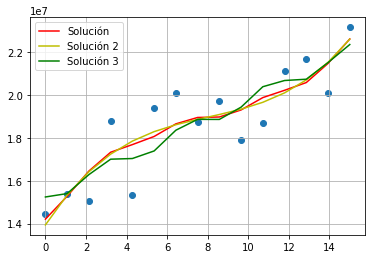

In [10]:
y_pred = 1.42058733e+07 + 1.27976469e+06*x -1.27977880e+05*x**2 + 5.28670495e+03*x**3 + 1.64131188e+05*np.sin(7e+07*x)
y_pred_2 = 1.39357387e+07 + 1.46167531e+06*x -1.55720123e+05*x**2 + 6.45364223e+03*x**3
y_pred_3 = 15239821.73842372 +452450.78038003*x + 328054.69848328*np.sin(7e+07*x)
plt.figure()
plt.scatter(x,exp)
plt.plot(x,y_pred,"r",label='Solución')
plt.plot(x,y_pred_2,"y",label='Solución 2')
plt.plot(x,y_pred_3,"g",label='Solución 3')
plt.legend()
plt.grid()

Decidimos que la curva que predice mejor el fenómeno es la solución 2, o la curva de grado tres:

$$ 1.39357387*10^7 + (1.46167531*10^6*x) - (1.55720123*10^5*x^2) + (6.45364223*10^3*x^3)$$

>Porque tiene un error cuadrático acumulado de 2.21e+13, que aunque no es el menor lo consideramos bastante bueno. El menor lo tenemos con la solución 1 y es de 2.17e+13, pero en comparación con los errores de las otras soluciones (2.17e+13 y 2.51e+13) el de esta es aceptable.

>Además, las soluciones con un monomio en función senoidal asumen que si en un año hubo un pico, en el siguiente las exportaciones caerán, algo que pensamos no será cierto para los años entre 2023 y 2024, creemos que las exportaciones crecerán en este periodo. Nuestra hipótesis se basa en lo siguiente:

>> 1. Los precios de los productos están subiendo mucho y los datos que genera el INEGI son en precios corriente, no hay un año base de referencia para ajustar el valor de las exportaciones, entonces cualquier caída en la productividad entre la pandemia y lo que va del 2022 se vería compensada con la inflación sufrida durante el 2022.
>> 2. La tendencia del nearshoring ha tenido un rápido crecimiento como resultado de la pandemia, las tensiones comerciales con China y el riesgo que asumen las empresas al concentrar mucha de su producción en Asia. El nearshoring beneficia bastante a México, al ser el principal socio comercial de Estados Unidos y con un renovado tratado comercial hace de esta relocalización una oportunidad única (Morales Francisco, 2022). Prevemos que el estado de Jalisco se verá beneficiado en el corto y (si sigue esta tendencia) mediano plazo.

>Finalmente, lo escogimos porque observamos (gráficamente) que la ventaja que nos da la solución 1 sobre el error cuadrático no compensa la forma que dibuja. Creemos que para 2024 el error que tendríamos al usar la solución 1 sería mayor que el que tendríamos al usar la solución 2.

A continuación visualizamos la curva de la mejor solución y los puntos:

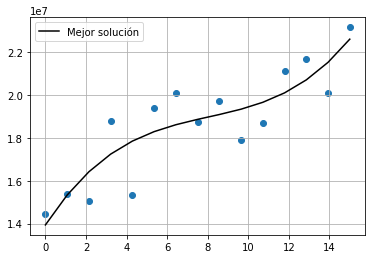

In [39]:
y_pred_final = 1.39357387e+07 + 1.46167531e+06*x -1.55720123e+05*x**2 + 6.45364223e+03*x**3

plt.figure()
plt.scatter(x,exp)
plt.plot(x,y_pred_2,"k",label='Mejor solución')
plt.legend()
plt.grid()

### PREDICCIÓN PARA 2024
**Consecución del objetivo general**

In [41]:
# Definimos la función y la evaluamos en (m+3) o (2021+3 años)
def funcion_prediccion(x):
    return 1.39357387e+07 + 1.46167531e+06*x -1.55720123e+05*x**2 + 6.45364223e+03*x**3
funcion_prediccion(m+3)

27430215.913360007

Usando el modelo que mejor ajusta los puntos obtenemos que para 2024 Jalisco exportá  **27,430** millones de dólares en total.

### Conclusiones.

> Los datos que INEGI son válidos y confiables considerando que representan el valor total de las exportaciones de Jalisco, a pesar de no tener un año base para ajustar los precios. Estas mediciones son de suma importancia para las autoridades porque hablan de un componente de su PIB y de su contribución a las exportaciones nacionales, datos necesarios para la elaboración de políticas públicas a nivel estatal y nacional, planeación presupuestaria, entre otras.

> Al momento de obtener la ecuación hicimos tres análisis para así estar seguros de que estábamos tomando la curva que mejor se ajustara a nuestras necesidades. Al final, llegamos a la conclusión de que la función con polinomio de grado 3 se ajustaba mejor a los datos que las de grados menores y las que involucraban el seno.

> A nivel gráfico podemos observar que el error acumulado entre las curvas que modelamos y los puntos de los valores históricos es relativamente grande, a pesar de haber realizado varios modelos, entonces concluimos que necesitamos un modelo de series de tiempo para predecir con mayor precisión el comportamiento de las exportaciones en Jalisco. Las series de tiempo son un grupo de herramientas matemáticas y estadísticas que sirven para crear un modelo que explique la evolución de un fenómeno en el tiempo, tomando en cuenta el peso que tienen los valores pasados y los componentes tendenciales que lo afectan (López Francisco, 2018). 

> Analizando la predicción obtenida para las exportaciones de Jalisco en 2024 concluimos que es un valor lógico, ya que es cercano a los valores de años pasados pero cumple con la tendencia de ir aumentando que se puede observar a lo largo de los años. Al usar una función cúbica para modelar conocemos que los valores de la variable dependiente tienden a crecer rápidamente mientras más aumenta el valor de la variable independiente, entonces es probable que el valor de las exportaciones sea menor, pero cercano, a los 27,400 millones de dólares.

### 2.7 Referencias.
> - Geografía, E. D. N. I. Y. (s. f.). Exportaciones por entidad federativa. Recuperado 17 de septiembre de 2022, de https://www.inegi.org.mx/temas/exportacionesef/#Tabulados
> - Francisco Coll Morales ( 22 de septiembre de 2022 ). *El Nearshoring funciona en México*. Forbes México. Recuperao de: https://www.forbes.com.mx/el-nearshoring-funciona-en-mexico/
> - José Francisco López ( 2018 ). *Serie Temporal*. Economipedia. Recuperado de: https://economipedia.com/definiciones/serie-temporal.html#:~:text=Una%20serie%20temporal%20es%20un%20conjunto%20de%20datos,variables%20se%20recogen%20a%20lo%20largo%20del%20tiempo